# Mini-projeto sobre Árvores de Decisão
**Dataset:** Titanic

**Grupo:**
*   Amanda Moraes
*   Luis Eduardo Alves
*   Maria Eduarda dos Santos
*   Samuel Santos
*   Tales Tomaz Alves

## Dependências

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

## Dados

In [2]:
# load train and test sets files here
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


### Entendendo os arquivos do kaggle

O arquivo `train.csv` contém dados de entrada com suas respectivas saídas: a coluna `Survived`.

In [3]:
#decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')), index_col='PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


O arquivo `test.csv` contém dados de entrada sem suas saídas esperadas: não possui a coluna `Survived`.

In [34]:
#decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')), index_col='PassengerId')
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Levando em conta o objetivo desta atividade (a variação de parâmetros e avaliações de diferentes árvores de decisão), apenas os dados rotulados (do arquivo `train.csv`) serão utilizados como dataset para o treinamento e variação de parâmetros, pois possuem as saídas esperadas para cada uma das suas entradas. O arquivo `test.csv` será utilizado no final para obter uma pontuação do melhor modelo no kaggle.

In [5]:
df = df_train
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


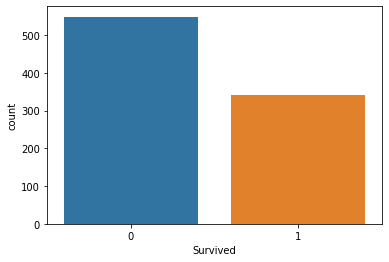

In [6]:
sns.countplot(df['Survived'])

### Limpeza e particionamento dos dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [8]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df = df.dropna()

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Árvores de decisão

In [9]:
RANDOM_STATE = 1

### Árvore 1
Parâmetros:

*   **Maximum Depth:** `None`
  - Profundidade máxima da árvore. Se for igual a `None`, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split samples
*   **Minimum Samples to Split:** `2`
  - O número mínimo de amostras (ou fração de amostras) necessário para dividir um nó interno
*   **Minimum Samples at Leafs:** `1`
  - O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leaf amostras de treinamento em cada um dos ramos esquerdo e direito.



#### Definição e treinamento da árvore

In [ ]:
tree_model = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_STATE, splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Visualização da árvore

In [ ]:
target = list(df['Survived'].apply(str).unique())
feature_names = list(x.columns)

##### Visualização panorâmica:

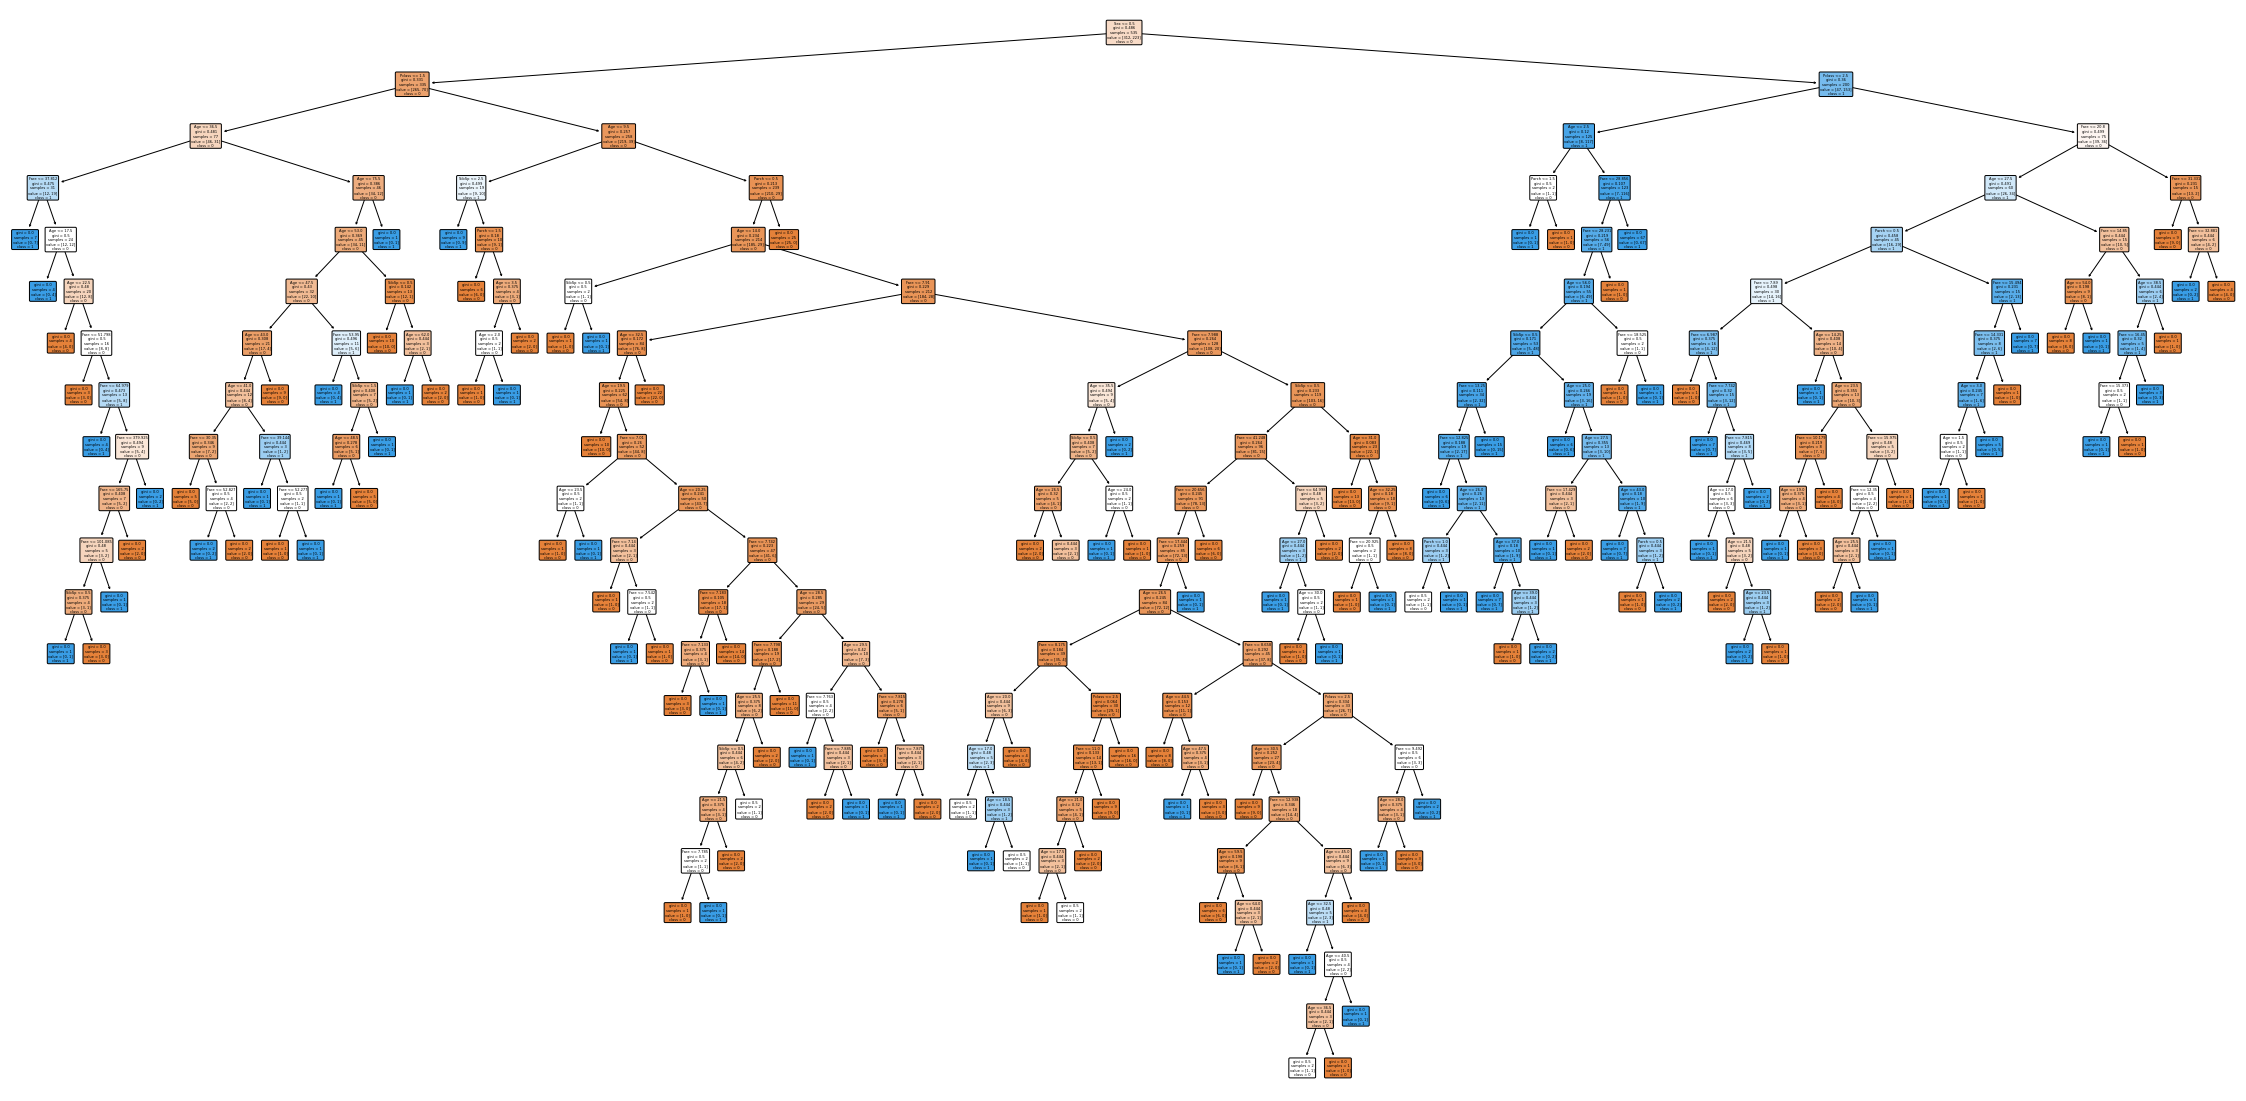

In [ ]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_model,
                  feature_names=feature_names,  
                  class_names=target,  
                  filled=True, rounded=True,) 
plt.show()

##### Visualização detalhada:

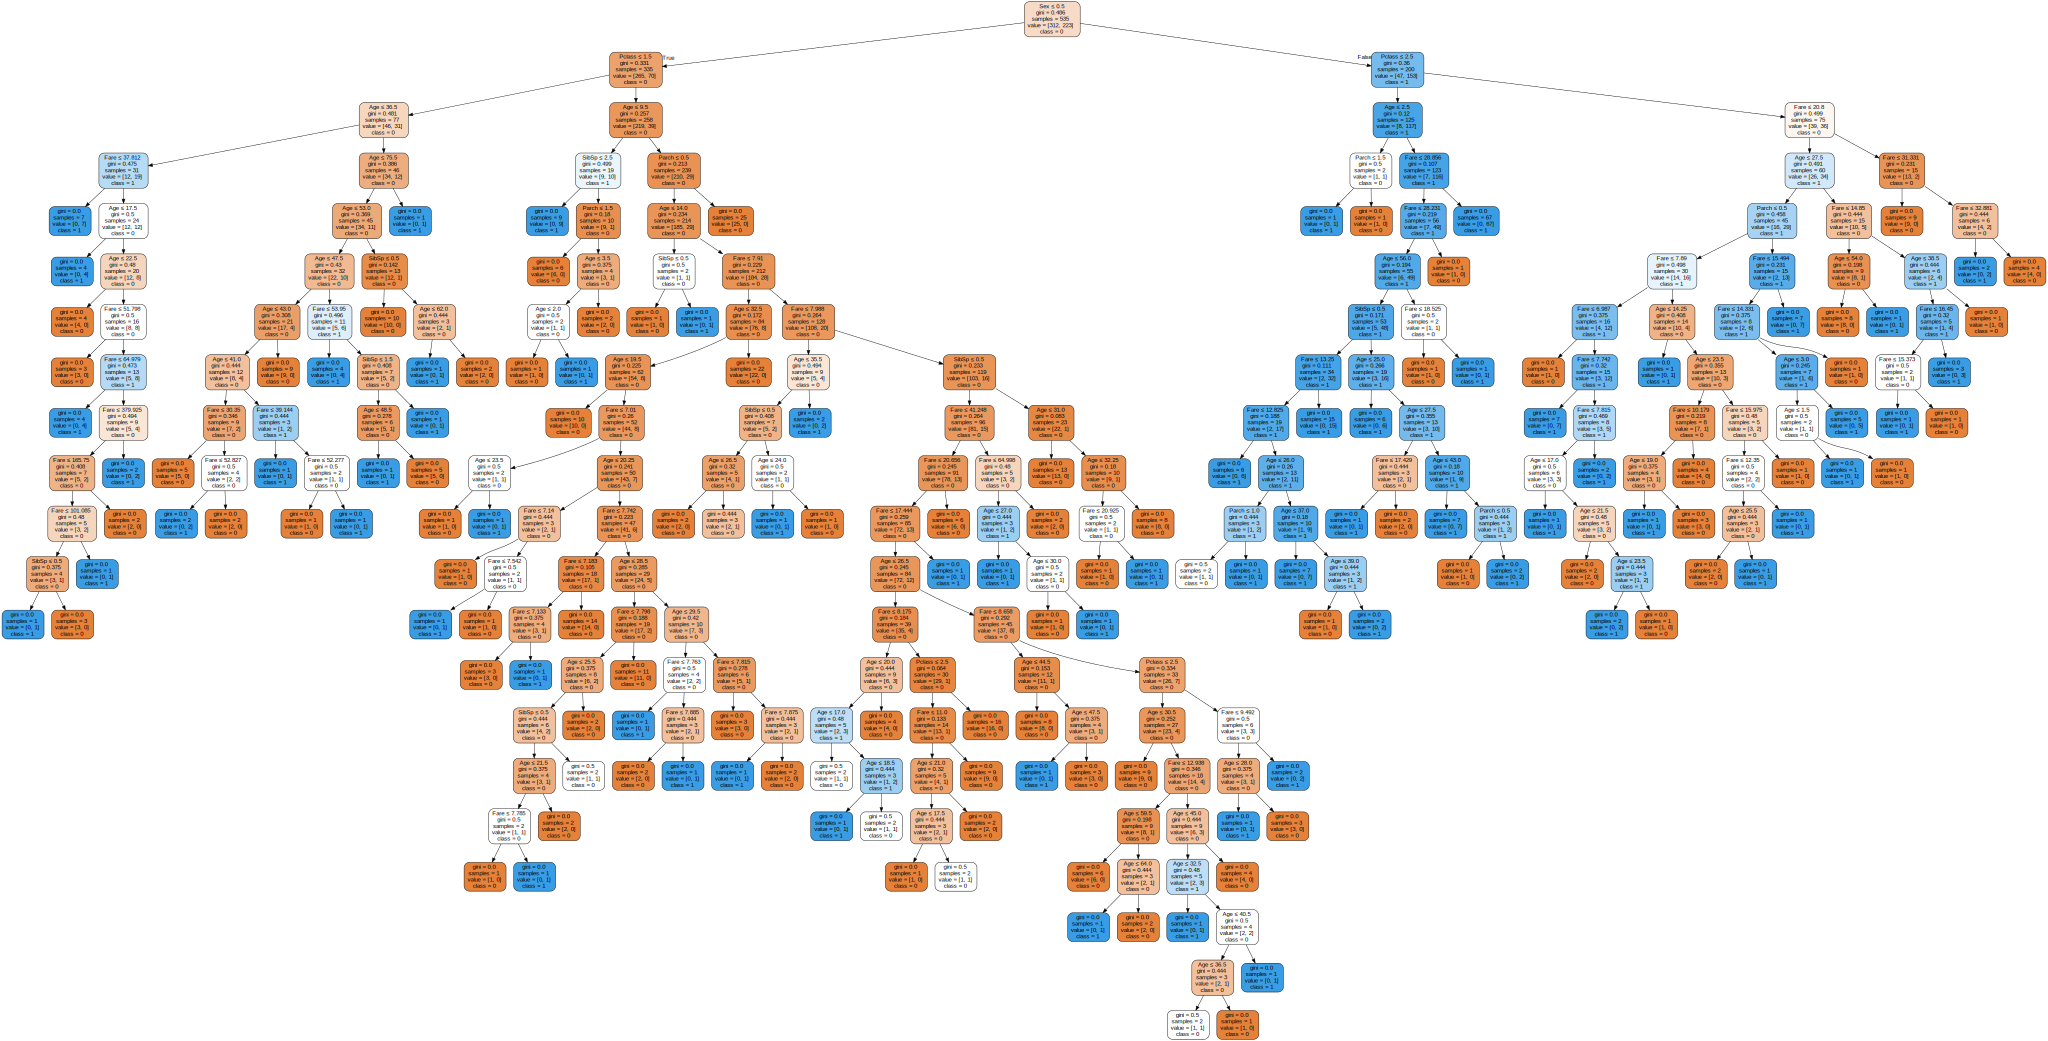

In [ ]:
dot_data = tree.export_graphviz(tree_model,
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

#### Avaliação da árvore

##### Acurácia, precisão, recall, f1-score

Avaliação de performance no conjunto de teste:

In [ ]:
predicted = tree_model.predict(x_test)
accuracy_score(y_test, predicted)

0.8156424581005587

In [ ]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       112
           1       0.76      0.75      0.75        67

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Avaliação de performance no conjunto de treino:

In [ ]:
predicted_train = tree_model.predict(x_train)
accuracy_score(y_train, predicted_train)

0.9869158878504672

In [ ]:
report = classification_report(y_train, predicted_train)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       312
           1       1.00      0.97      0.98       223

    accuracy                           0.99       535
   macro avg       0.99      0.98      0.99       535
weighted avg       0.99      0.99      0.99       535



##### Matriz de confusão

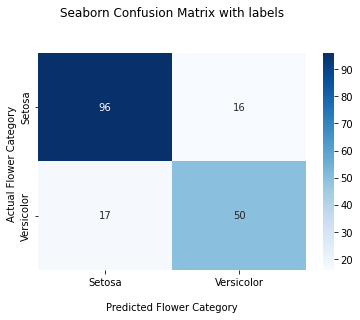

In [ ]:
cm = confusion_matrix(y_test, predicted)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
tree_model.get_depth()

20

### Variando o parâmetro `max_depth`

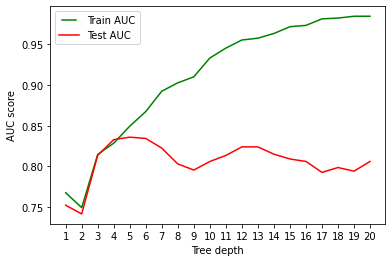

In [28]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'g', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks(max_depths)
plt.show()

#### Conclusão
Como visto no gráfico acima, o aumento da profundidade pode levar a cenários de overfitting, enquanto valores mais baixos podem levar ao underfitting (o modelo não performa bem nem nos dados de treinamento, nem nos dados de teste).
Além disso, a partir do depth igual a 4, não há ganhos significativos de performance nos dados de teste e há um sobreajuste nos de treino. **Portanto, é possível assumir o valor de `max_depth` igual a `4` como o ideal para o classificador em questão até então**.

### Variando o parâmetro `min_samples_split`

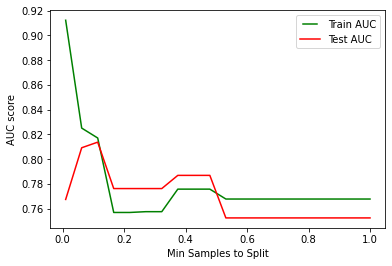

In [ ]:
min_samples_splits = np.linspace(0.01, 1.0, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples to Split')
plt.show()

#### Conclusão
Como visto no gráfico acima, o aumento do parâmetro ou a redução exagerada (< 0.1) pode levar a cenários de underfitting e overfitting, respectivamente, enquanto valores razoavelmente baixos levaram a melhores AUC e maior equilíbrio entre a performance nos dados de treino e teste.
Percebe-se que a partir do valor de aproximadamente 0.15, há queda de performance e maior diferença entre treino e teste. **Portanto, é possível assumir o valor de `min_samples_split` igual a aproximadamente `0.1` como o ideal para o classificador em questão até então**.

### Variando o parâmetro `min_samples_leafs`

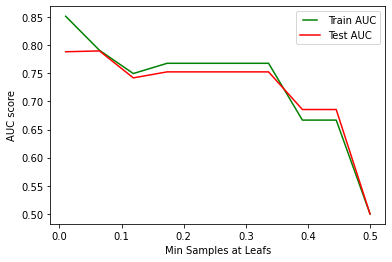

In [ ]:
min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples at Leafs')
plt.show()

#### Conclusão
Como visto no gráfico acima, o aumento do parâmetro ou a redução exagerada (< 0.05) pode levar a cenários de underfitting e overfitting, respectivamente, enquanto valores razoavelmente baixos levam a melhores AUC e maior equilíbrio entre a performance nos dados de treino e teste.
Percebe-se que a partir do valor de aproximadamente 0.35, há queda significativa de performance. **Portanto, é possível assumir o valor de `min_samples_leafs` igual a aproximadamente `0.06` como o ideal para o classificador em questão até então**.

### Árvore 2
Parâmetros:

*   **Maximum Depth:** `4`
  - Profundidade máxima da árvore. Se for igual a `None`, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split samples
*   **Minimum Samples to Split:** `0.1`
  - O número mínimo ou fração mínima de amostras necessário para dividir um nó interno
*   **Minimum Samples at Leafs:** `0.06`
  - O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leaf amostras de treinamento em cada um dos ramos esquerdo e direito.



#### Definição e treinamento da árvore

In [29]:
tree_model = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_STATE, splitter='best', max_depth=4, min_samples_split=0.1, min_samples_leaf=0.06)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.06,
                       min_samples_split=0.1, random_state=1)

#### Visualização da árvore

In [30]:
target = list(df['Survived'].apply(str).unique())
feature_names = list(x.columns)

##### Visualização panorâmica:

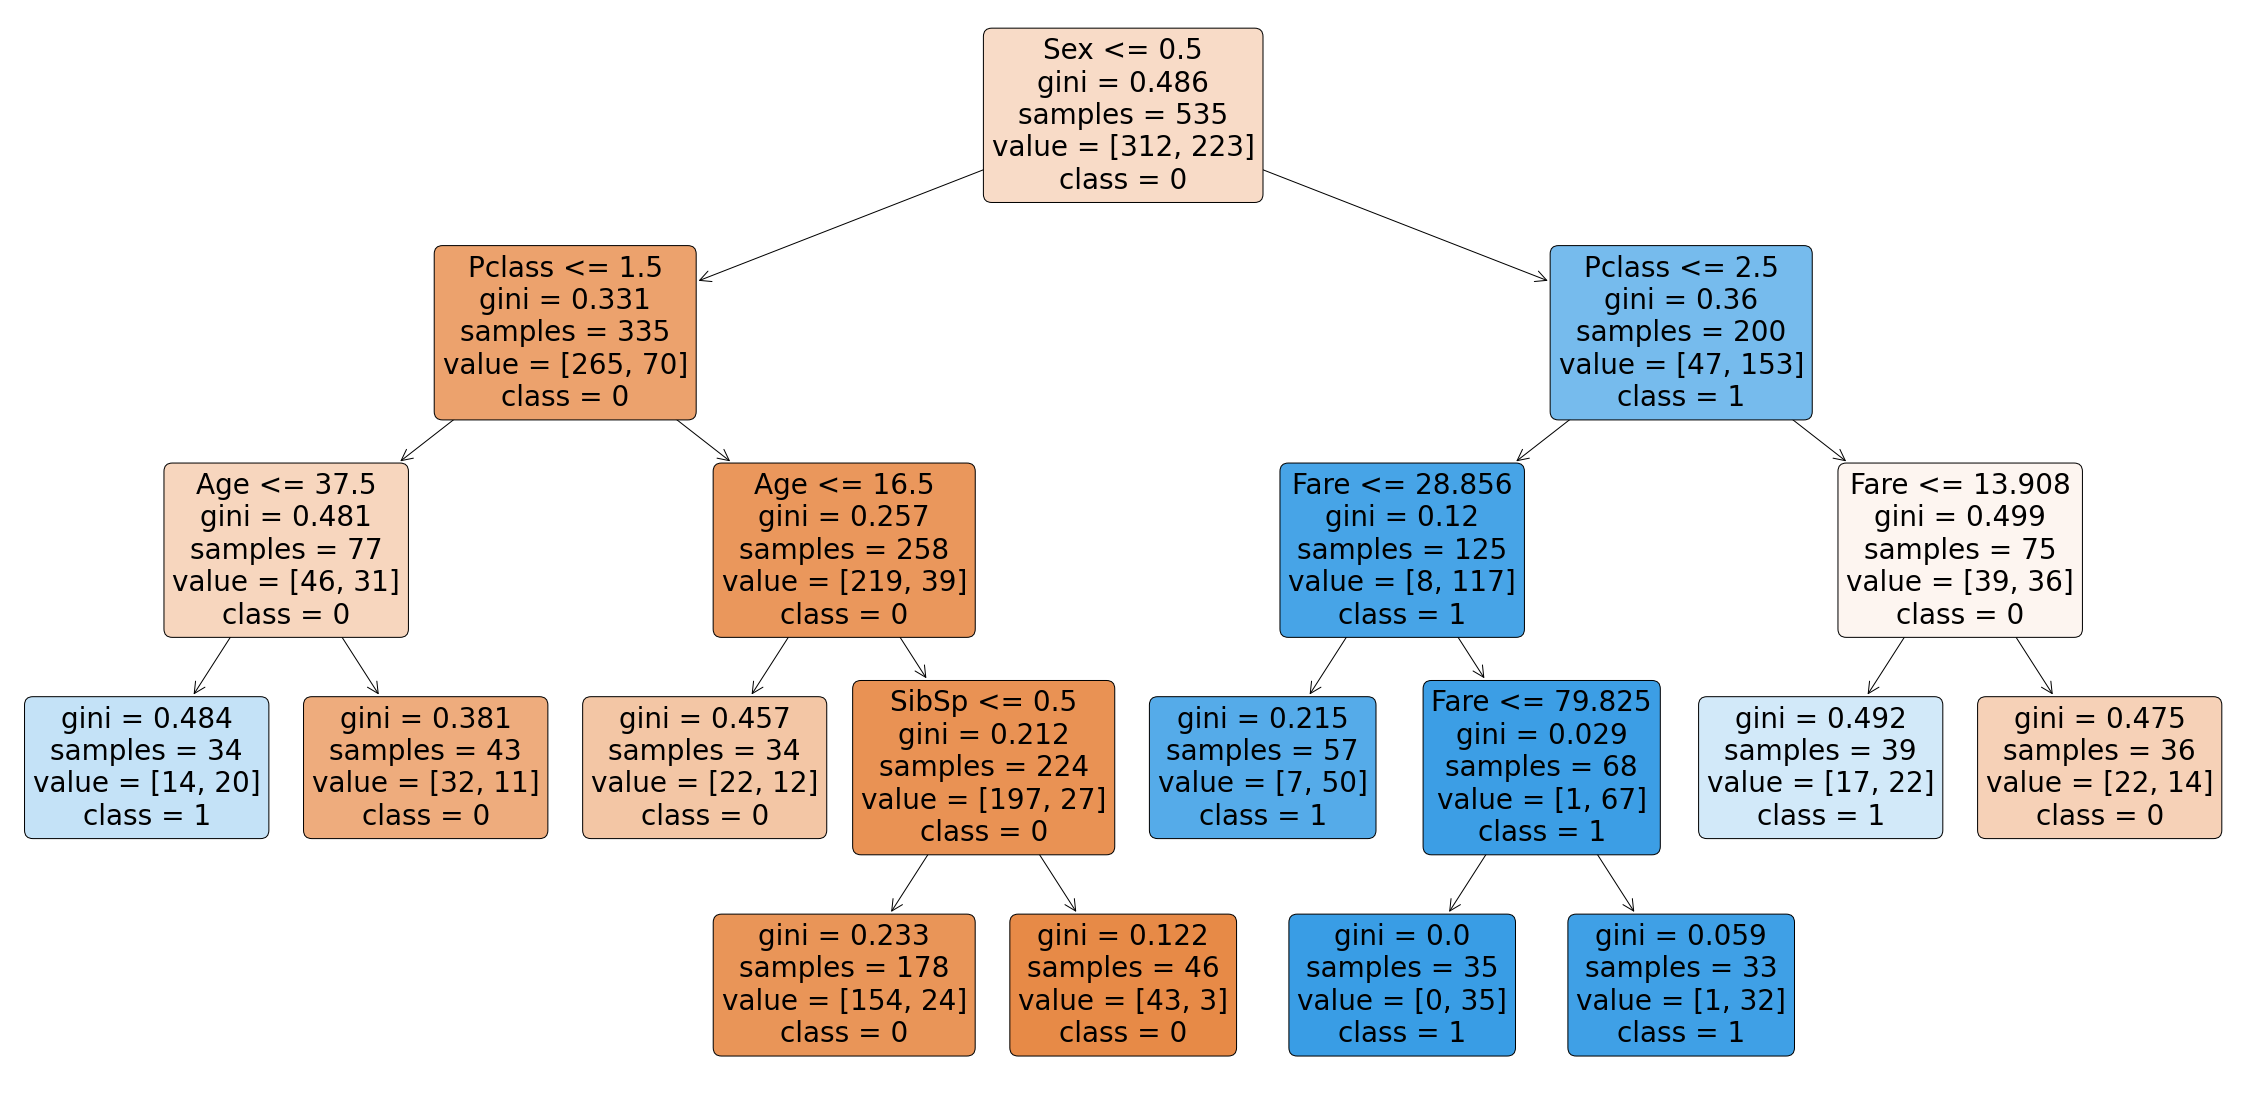

In [12]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_model,
                  feature_names=feature_names,  
                  class_names=target,  
                  filled=True, rounded=True,) 
plt.show()

##### Visualização detalhada:

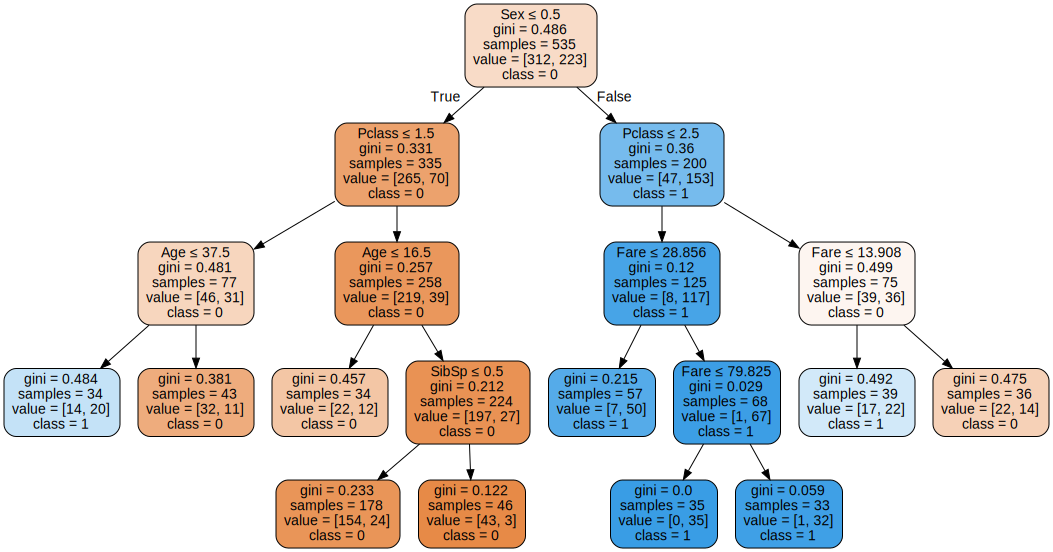

In [13]:
dot_data = tree.export_graphviz(tree_model,
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

#### Avaliação da árvore

##### Acurácia, precisão, recall, f1-score

Avaliação de performance no conjunto de teste:

In [31]:
predicted = tree_model.predict(x_test)
accuracy_score(y_test, predicted)

0.8100558659217877

In [15]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.79      0.67      0.73        67

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



Avaliação de performance no conjunto de treino:

In [16]:
predicted_train = tree_model.predict(x_train)
accuracy_score(y_train, predicted_train)

0.8074766355140187

In [17]:
report = classification_report(y_train, predicted_train)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       312
           1       0.80      0.71      0.76       223

    accuracy                           0.81       535
   macro avg       0.81      0.79      0.80       535
weighted avg       0.81      0.81      0.81       535



##### Matriz de confusão

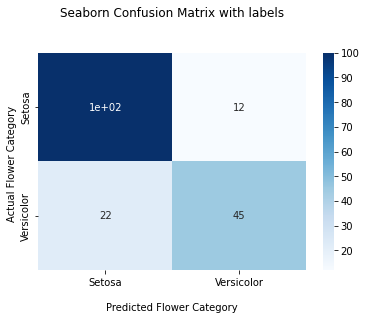

In [18]:
cm = confusion_matrix(y_test, predicted)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Submissão de resultados no kaggle

### Dados

In [42]:
#decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
df_example_submission = pd.read_csv(io.StringIO(uploaded['gender_submission.csv'].decode('utf-8')))
df_example_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [36]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
892,3,0,34.5,0,0,7.8292
893,3,1,47.0,1,0,7.0000
894,2,0,62.0,0,0,9.6875
895,3,0,27.0,0,0,8.6625
896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.0500
1306,1,1,39.0,0,0,108.9000
1307,3,0,38.5,0,0,7.2500


### Tratando dados faltantes

In [38]:
df_test=df_test.fillna(df_test.mean())

### Predição com o modelo

In [39]:
predicted_test_kaggle = tree_model.predict(df_test)
predicted_test_kaggle

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [43]:
df_example_submission['Survived'] = predicted_test_kaggle
df_example_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Submissão e resultado

In [47]:
df_example_submission.to_csv('test_submission.csv', index=False)

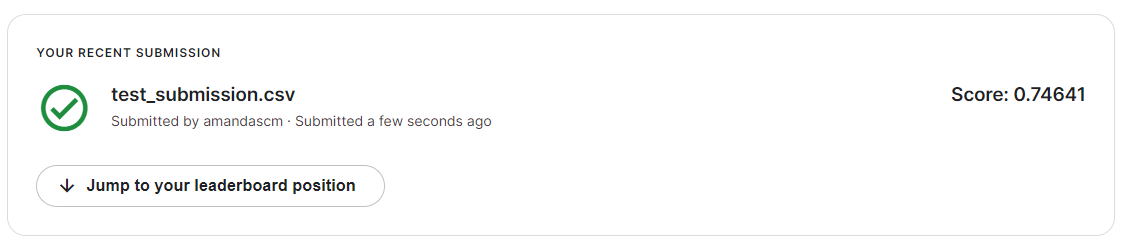

## Resumo

Com as experimentações apresentadas, as tendências de ganho percebidas com a variação de parâmetros da árvore foram:

*   Valores menores de `max_depth` (com relação ao valor máximo atingido sem limitação de profundidade)
  - Ajudam a reduzir complexidade do modelo
  - Diminuem a especificidade das condições (chance de overfitting)
*   Valores baixos / medianos de `min_samples_split` (com relação ao tamanho da base)
  - Ajudam a evitar condições muito específicas sobre os dados de treino (overfitting)
*   Valores medianos de `min_samples_leaf` (com relação ao tamanho da base)
  - Valores muito baixos levam ao overfitting

| Parâmetros variados | Valores considerados |
|--- |--- |
| Profundidade máxima | [ 1, 2, ... 20 ] |
| Mínimo de amostras para split | [ 1%, 6%, ... 100% ] |
| Mínimo de amostras nas folhas | [ 1%, 6%, ... 50% ] |

---

| | Modelo inicial | Modelo final |
|--- |--- |--- |
| Profundidade máxima -> Profundidade | inf -> 5 | 4 -> 4 |
| Mínimo de amostras para split | 2 | 10% (~80) |
| Mínimo de amostras nas folhas | 1 | 6% (~50) |
| Acurácia teste | 82% | 81% |
| Acurácia treino | 99% | 81% |
